In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score,precision_score, recall_score,classification_report

In [60]:
df = pd.read_csv('train_LZV4RXX.csv')
df.head()

,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [61]:
df.shape

(7000, 10)

In [62]:
df['age'].unique()

array([27, 48, 30, 28, 29, 34, 46, 32, 36, 25, 38, 40, 41, 44, 47, 33, 42,
       26, 45, 37, 31, 43, 49, 35, 24, 50, 39, 23, 22, 21])

In [63]:
df['education'].unique()

array([ 1.,  2., nan])

In [64]:
df.isnull().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [65]:
df.loan_default.value_counts()

0    4200
1    2800
Name: loan_default, dtype: int64

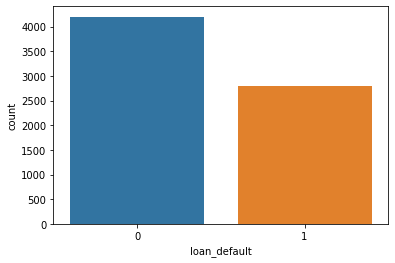

In [66]:
#count the number of defaulters and non-defaulters in the dataset
sns.countplot(data=df,x='loan_default')

In [67]:
df['loan_default'].value_counts()

0    4200
1    2800
Name: loan_default, dtype: int64

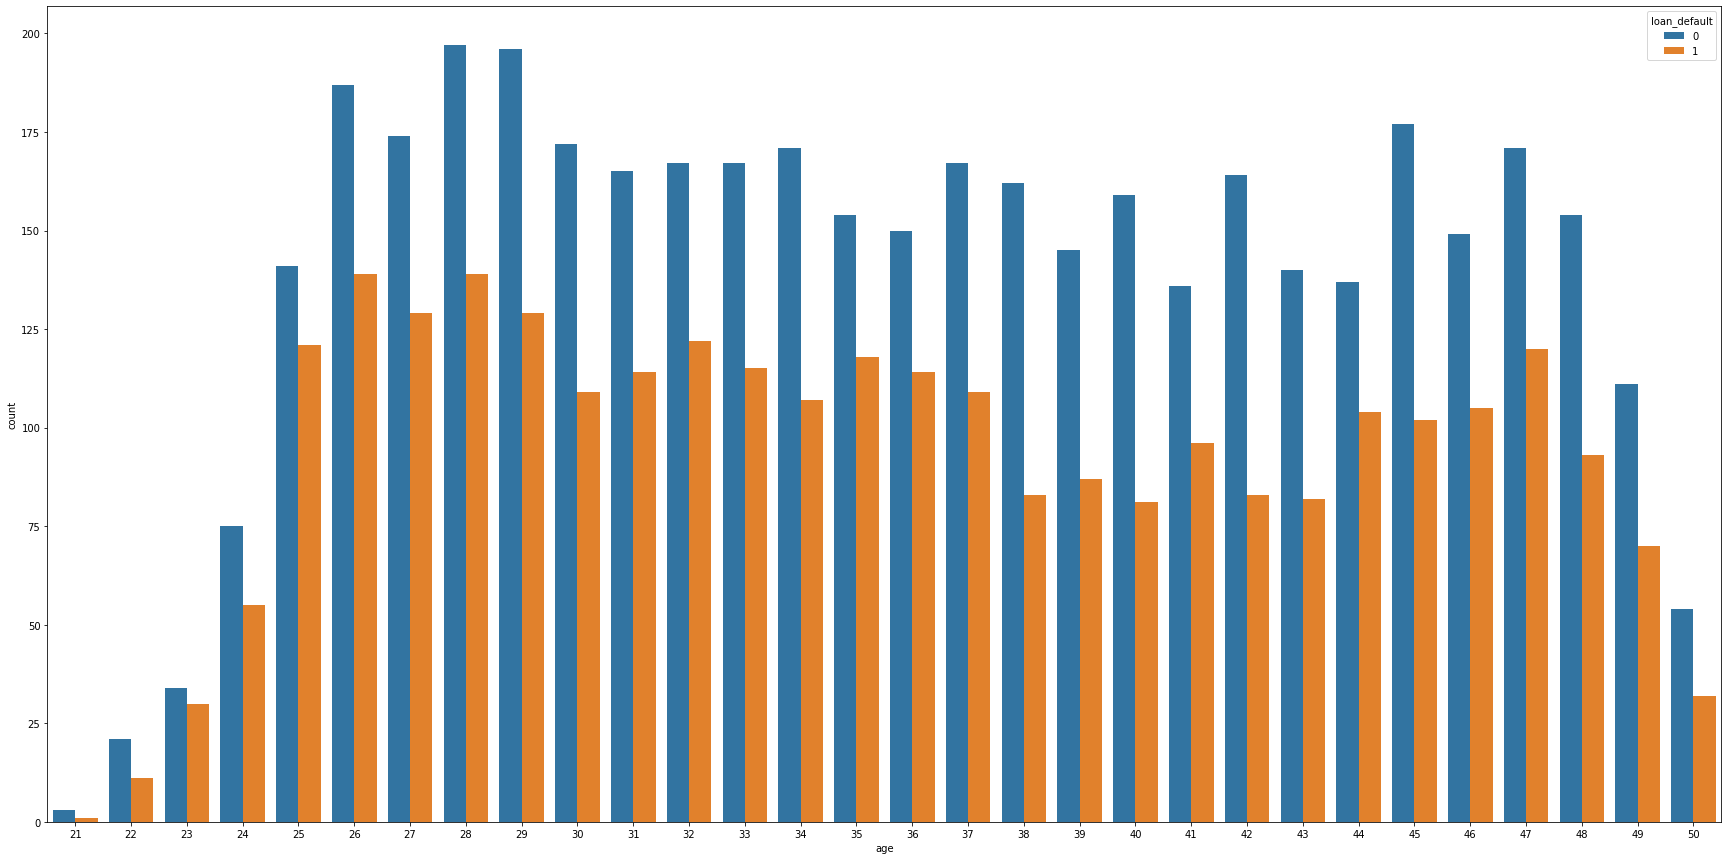

In [68]:
plt.figure(figsize = (30,15))
sns.countplot(data=df,x='age',hue='loan_default')

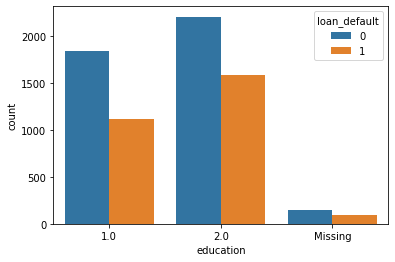

In [69]:
df_dummy = df.copy()
df_dummy['education'] = df['education'].fillna('Missing')

# plotting the countplot for education
sns.countplot(data=df_dummy,x='education',hue='loan_default')

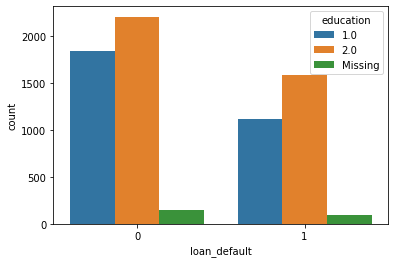

In [70]:
sns.countplot(data=df_dummy,x='loan_default',hue='education')

In [71]:
df_dummy[df_dummy['education']=='Missing']['proof_submitted'].value_counts()

Aadhar      226
VoterID      17
PAN           1
Passport      1
Name: proof_submitted, dtype: int64

In [72]:
df_dummy['proof_submitted'].value_counts()

Aadhar      5931
VoterID      707
PAN          235
Driving      114
Passport      13
Name: proof_submitted, dtype: int64

In [73]:
df_dummy[df_dummy['education']=='Missing']['loan_default'].value_counts()

0    149
1     96
Name: loan_default, dtype: int64

In [74]:
df_dummy[df_dummy['education']==2.0]['loan_default'].value_counts()

0    2208
1    1588
Name: loan_default, dtype: int64

In [75]:
df_dummy[df_dummy['education']==1.0]['loan_default'].value_counts()

0    1843
1    1116
Name: loan_default, dtype: int64

In [76]:
df_dummy[df_dummy['education']=='Missing']['age'].value_counts()

24    69
23    64
22    32
26     8
27     8
32     6
25     6
35     4
21     4
41     4
43     4
44     4
47     3
31     3
39     3
29     3
40     2
38     2
36     2
49     2
34     2
33     2
42     2
45     1
46     1
30     1
28     1
37     1
50     1
Name: age, dtype: int64

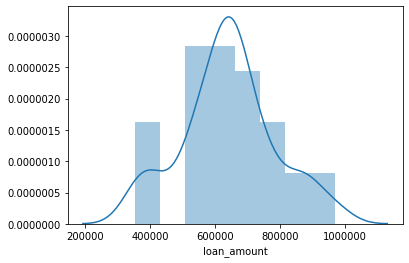

In [77]:
sns.distplot(df_dummy[(df_dummy['education']=='Missing') & (df_dummy['age']==22)]['loan_amount'])

In [78]:
print(df_dummy[(df_dummy['education']=='Missing') & (df_dummy['age']==39)]['loan_amount'].mean())
print(df_dummy[(df_dummy['education']=='Missing') & (df_dummy['age']==24)]['loan_amount'].min())
print(df_dummy[(df_dummy['education']=='Missing') & (df_dummy['age']==24)]['loan_amount'].max())

739300.0
342348
1382724


In [79]:
df_dummy[df_dummy['age']==25]['education'].value_counts()

1.0        145
2.0        111
Missing      6
Name: education, dtype: int64

In [80]:
df_dummy[df_dummy['age']==21]['education'].value_counts()

Missing    4
Name: education, dtype: int64

In [81]:
df_dummy[df_dummy['age']<25]['education'].value_counts()

Missing    169
2.0         33
1.0         28
Name: education, dtype: int64

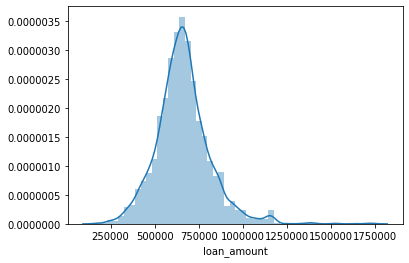

In [82]:
sns.distplot(df_dummy[df_dummy['education']==2.0]['loan_amount'])

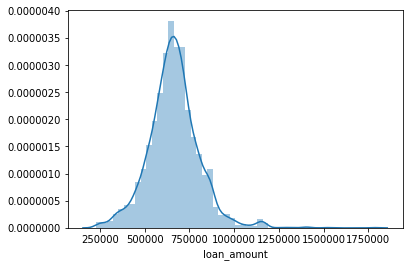

In [83]:
sns.distplot(df_dummy[df_dummy['education']==1.0]['loan_amount'])

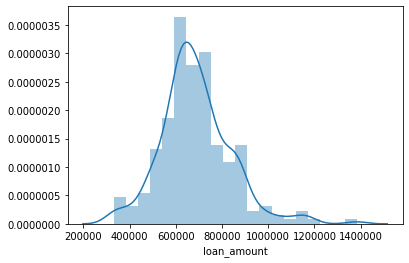

In [84]:
sns.distplot(df_dummy[df_dummy['education']=='Missing']['loan_amount'])

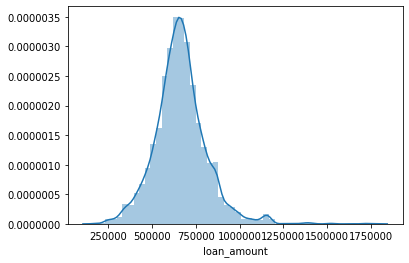

In [85]:
sns.distplot(df_dummy['loan_amount'])

### Imputing missing values in 'education' columns

In [86]:
# most of the missing values are for ages<=24, so lets treat them as another category and for remaining missing values lets
# fill the missing values with mode of education feature w.r.t to every age value

In [87]:
# df.loc[(df['age']<=24) & (df['education'].isnull()),'education'] = 0.0

In [88]:
# df['age'].value_counts()

In [89]:
# df['education'].value_counts(dropna=False)

In [90]:
# for i in df[df['age']>24]['age'].unique():
#     df.loc[(df['age']==i) & (df['education'].isnull()),'education'] = df[(df['age']==i)]['education'].mode()[0]

In [91]:
df['age'].value_counts()

28    336
26    326
29    325
27    303
47    291
32    289
33    282
30    281
31    279
45    279
34    278
37    276
35    272
36    264
25    262
46    254
42    247
48    247
38    245
44    241
40    240
41    232
39    232
43    222
49    181
24    130
50     86
23     64
22     32
21      4
Name: age, dtype: int64

In [92]:
# df['education'].value_counts(dropna=False)

### Binning the age column

In [93]:
# binning the age column
def binning(x):
    if(x<=25):
        return 'A'
    elif((x>25) & (x<=30)):
        return 'B'
    elif((x>30) & (x<=35)):
        return 'C'
    elif((x>35) & (x<=40)):
        return 'D'
    elif((x>40) & (x<=45)):
        return 'E'
    else:
        return 'F'

In [94]:
df['age_bin'] = df['age'].apply(binning)

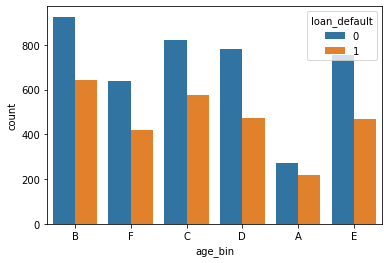

In [95]:
sns.countplot(data=df,x='age_bin',hue='loan_default')

In [96]:
df['age_bin'].value_counts()

B    1571
C    1400
D    1257
E    1221
F    1059
A     492
Name: age_bin, dtype: int64

In [97]:
df[df['age_bin']=='A']['education'].value_counts()

1.0    173
2.0    144
Name: education, dtype: int64

In [98]:
# filling the missing values in the 'education' column as per the 'age_bin' column
for i in df['age_bin'].unique() :
    df.loc[(df['age_bin']==i) & (df['education'].isnull()),'education'] = df[df['age_bin']==i]['education'].mode()[0]

In [99]:
df['education'].isnull().sum()

0

### we can club 'D' and 'E' in one group

In [100]:
# df['age_bin'].replace({'D':'E'},inplace = True)

In [101]:
df['age_bin'].value_counts()

B    1571
C    1400
D    1257
E    1221
F    1059
A     492
Name: age_bin, dtype: int64

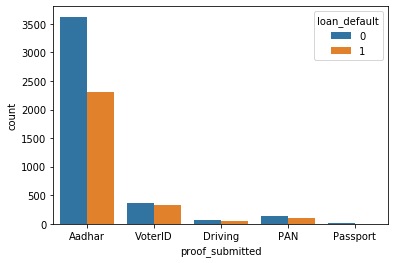

In [102]:
# countplot for proof_submitted_column
sns.countplot(data=df, x='proof_submitted', hue = 'loan_default')

### Replacing the proof_submitted with 'others' except for Aadhar

In [103]:
# df.loc[df['proof_submitted']!='Aadhar','proof_submitted'] = 'Others'

In [104]:
df.dtypes

loan_id               int64
age                   int64
education           float64
proof_submitted      object
loan_amount           int64
asset_cost            int64
no_of_loans           int64
no_of_curr_loans      int64
last_delinq_none      int64
loan_default          int64
age_bin              object
dtype: object

In [105]:
df['age_bin'].value_counts()

B    1571
C    1400
D    1257
E    1221
F    1059
A     492
Name: age_bin, dtype: int64

In [106]:
# converting the education column to categorical column
df['education'] = df['education'].astype(str)

In [107]:
df.dtypes

loan_id              int64
age                  int64
education           object
proof_submitted     object
loan_amount          int64
asset_cost           int64
no_of_loans          int64
no_of_curr_loans     int64
last_delinq_none     int64
loan_default         int64
age_bin             object
dtype: object

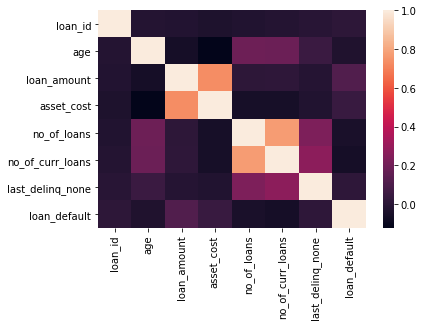

In [108]:
sns.heatmap(df.corr())

In [109]:
df.isnull().sum()

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
age_bin             0
dtype: int64

In [110]:
# Q1 = df['loan_amount'].quantile(0.25)
# Q3 = df['loan_amount'].quantile(0.75)

# IQR = Q3 - Q1

# df = df[~((df.loan_amount < (Q1 - 1.5 * IQR)) |(df.loan_amount > (Q3 + 1.5 * IQR)))]

In [111]:
# df['loan_amount'].isnull().sum()

In [112]:
# df['asset_cost'].describe()

In [113]:
# Q1 = df['asset_cost'].quantile(0.25)
# Q3 = df['asset_cost'].quantile(0.75)

# IQR = Q3 - Q1

# df = df[~((df.asset_cost < (Q1 - 1.5 * IQR)) |(df.asset_cost > (Q3 + 1.5 * IQR)))]

## Feature Engineering

In [114]:
df['loan_by_asset'] = df['loan_amount']/df['asset_cost']

## Data Preparation For Modeling

In [115]:
# df.drop(columns=['loan_amount'],axis=1,inplace=True)

In [116]:
df_1 = pd.get_dummies(df, columns = ['education','proof_submitted','age_bin'],drop_first=True)
df_1.columns

Index(['loan_id', 'age', 'loan_amount', 'asset_cost', 'no_of_loans',
       'no_of_curr_loans', 'last_delinq_none', 'loan_default', 'loan_by_asset',
       'education_2.0', 'proof_submitted_Driving', 'proof_submitted_PAN',
       'proof_submitted_Passport', 'proof_submitted_VoterID', 'age_bin_B',
       'age_bin_C', 'age_bin_D', 'age_bin_E', 'age_bin_F'],
      dtype='object')

In [117]:
df_1.drop(columns=['loan_id','age'],axis=1,inplace = True)

In [118]:
df_1['last_delinq_none'].value_counts()

0    6907
1      93
Name: last_delinq_none, dtype: int64

In [119]:
# df_1['proof_submitted_VoterID'].value_counts()

In [120]:
# df_1['proof_submitted_PAN'].value_counts()

In [121]:
# df_1['proof_submitted_Passport'].value_counts()

In [122]:
# df_1['proof_submitted_Driving'].value_counts()

In [123]:
#df_1.drop(columns=['last_delinq_none'],axis=1,inplace=True)

In [124]:
# # I can drop 'last_delinq_none' coz it doesnt have much variance rin it
# df_1.drop(columns=['last_delinq_none','proof_submitted_PAN','proof_submitted_Passport','proof_submitted_Driving'],axis=1,inplace=True)

In [125]:
# defining X & y
y = df_1['loan_default']
X = df_1.drop(columns = ['loan_default'], axis=1)

In [126]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                           for i in range(len(X.columns))]
  
# print(vif_data)

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [128]:
X_train

,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_by_asset,education_2.0,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID,age_bin_B,age_bin_C,age_bin_D,age_bin_E,age_bin_F
2994,690216,830412,0,0,0,0.831173,0,0,0,0,0,1,0,0,0,0
2135,697764,860268,0,0,0,0.811101,1,0,0,0,0,0,0,0,0,1
1478,684156,791364,0,0,0,0.864528,0,0,0,0,0,1,0,0,0,0
5741,514728,746724,4,3,0,0.689315,0,0,0,0,0,0,1,0,0,0
573,1413804,2126532,3,3,0,0.664840,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,761364,962412,0,0,0,0.791100,1,0,0,0,0,1,0,0,0,0
4572,735756,896436,0,0,0,0.820757,0,1,0,0,0,0,1,0,0,0
2531,826524,1021320,21,9,0,0.809270,1,0,0,0,0,0,0,1,0,0
6769,525204,833616,5,2,0,0.630031,0,0,0,0,0,0,0,0,0,0


In [129]:
X_train.describe()

,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_by_asset,education_2.0,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID,age_bin_B,age_bin_C,age_bin_D,age_bin_E,age_bin_F
count,5.600000e+03,5.600000e+03,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000,5600.000000
mean,6.641204e+05,9.188757e+05,2.853036,1.380714,0.013393,0.730510,0.550357,0.016250,0.033393,0.001964,0.104821,0.221071,0.197321,0.185536,0.174464,0.151429
std,1.506913e+05,2.182594e+05,5.503965,2.177033,0.114960,0.111725,0.497502,0.126447,0.179676,0.044281,0.306351,0.415006,0.398013,0.388766,0.379542,0.358498
min,1.678800e+05,4.733520e+05,0.000000,0.000000,0.000000,0.207875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.787060e+05,7.979010e+05,0.000000,0.000000,0.000000,0.673947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.571080e+05,8.586360e+05,0.000000,0.000000,0.000000,0.752545,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.373640e+05,9.596760e+05,3.000000,2.000000,0.000000,0.814541,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.744344e+06,2.298576e+06,109.000000,27.000000,1.000000,0.933480,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
X_train.isnull().sum()

loan_amount                 0
asset_cost                  0
no_of_loans                 0
no_of_curr_loans            0
last_delinq_none            0
loan_by_asset               0
education_2.0               0
proof_submitted_Driving     0
proof_submitted_PAN         0
proof_submitted_Passport    0
proof_submitted_VoterID     0
age_bin_B                   0
age_bin_C                   0
age_bin_D                   0
age_bin_E                   0
age_bin_F                   0
dtype: int64

In [131]:
y_train

2994    0
2135    1
1478    0
5741    1
573     1
       ..
2118    0
4572    1
2531    0
6769    0
1946    0
Name: loan_default, Length: 5600, dtype: int64

In [132]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [133]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
threshold = 0.42

In [135]:
#making predictions on the train dataset
y_predict_train = (logmodel.predict_proba(X_train)[:,1]>=threshold).astype(int)

# checking the metric score
print(f"Confusion_matrix: {confusion_matrix(y_train,y_predict_train)}")
print(f"f1_score: {f1_score(y_train,y_predict_train)}")
print(f"accuracy: {accuracy_score(y_train,y_predict_train)}")
print(f"roc_auc_score: {roc_auc_score(y_train,y_predict_train)}")
print(f"classification_report: {classification_report(y_train,y_predict_train)}")

Confusion_matrix: [[1322 1999]
 [ 753 1526]]
f1_score: 0.5258442453480359
accuracy: 0.5085714285714286
roc_auc_score: 0.5338323979505213
classification_report:               precision    recall  f1-score   support

           0       0.64      0.40      0.49      3321
           1       0.43      0.67      0.53      2279

    accuracy                           0.51      5600
   macro avg       0.54      0.53      0.51      5600
weighted avg       0.55      0.51      0.50      5600



In [136]:
#making predictions on the test dataset
y_predict_test = (logmodel.predict_proba(X_test)[:,1]>=threshold).astype(int)

# checking the metric score
print(f"Confusion_matrix: {confusion_matrix(y_test,y_predict_test)}")
print(f"f1_score: {f1_score(y_test,y_predict_test)}")
print(f"accuracy: {accuracy_score(y_test,y_predict_test)}")
print(f"roc_auc_score: {roc_auc_score(y_test,y_predict_test)}")

Confusion_matrix: [[342 537]
 [164 357]]
f1_score: 0.5045936395759718
accuracy: 0.4992857142857143
roc_auc_score: 0.5371496138300591


### Implementing SVM

In [137]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

In [138]:
# svc = SVC(class_weight='balanced',probability=True, verbose=True)

# parameters = {'C':[0.1, 1, 10]}

# clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train, y_train)


In [139]:
# #making predictions on the train dataset
# y_predict_train = (clf_svc.predict_proba(X_train)[:,1]>=threshold).astype(int)

# # checking the metric score
# print(f"Confusion_matrix: {confusion_matrix(y_train,y_predict_train)}")
# print(f"f1_score: {f1_score(y_train,y_predict_train)}")
# print(f"accuracy: {accuracy_score(y_train,y_predict_train)}")
# print(f"roc_auc_score: {roc_auc_score(y_train,y_predict_train)}")
# print(f"classification_report: {classification_report(y_train,y_predict_train)}")

In [140]:
# #making predictions on the test dataset
# y_predict_test = (clf_svc.predict_proba(X_test)[:,1]>=threshold).astype(int)

# # checking the metric score
# print(f"Confusion_matrix: {confusion_matrix(y_test,y_predict_test)}")
# print(f"f1_score: {f1_score(y_test,y_predict_test)}")
# print(f"accuracy: {accuracy_score(y_test,y_predict_test)}")
# print(f"roc_auc_score: {roc_auc_score(y_test,y_predict_test)}")

### Random Forest

In [141]:
classifier = RandomForestClassifier(max_depth = 6, n_estimators = 200, max_features='auto',min_samples_split=50)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [142]:
#making predictions on the train dataset
#y_predict_train = classifier.predict(X_train)
y_predict_train = (classifier.predict_proba(X_train)[:,1]>=threshold).astype(int)

# checking the metric score
print(f"Confusion_matrix: {confusion_matrix(y_train,y_predict_train)}")
print(f"f1_score: {f1_score(y_train,y_predict_train)}")
print(f"accuracy: {accuracy_score(y_train,y_predict_train)}")
print(f"roc_auc_score: {roc_auc_score(y_train,y_predict_train)}")
print(f"classification_report: {classification_report(y_train,y_predict_train)}")

Confusion_matrix: [[1943 1378]
 [ 815 1464]]
f1_score: 0.5717633274751025
accuracy: 0.6083928571428572
roc_auc_score: 0.6137258756917928
classification_report:               precision    recall  f1-score   support

           0       0.70      0.59      0.64      3321
           1       0.52      0.64      0.57      2279

    accuracy                           0.61      5600
   macro avg       0.61      0.61      0.61      5600
weighted avg       0.63      0.61      0.61      5600



In [143]:
#making predictions on the test dataset
#y_predict_test =  classifier.predict(X_test)
y_predict_test = (classifier.predict_proba(X_test)[:,1]>=threshold).astype(int)

# checking the metric score
print(f"Confusion_matrix: {confusion_matrix(y_test,y_predict_test)}")
print(f"f1_score: {f1_score(y_test,y_predict_test)}")
print(f"accuracy: {accuracy_score(y_test,y_predict_test)}")
print(f"roc_auc_score: {roc_auc_score(y_test,y_predict_test)}")

Confusion_matrix: [[494 385]
 [221 300]]
f1_score: 0.49751243781094534
accuracy: 0.5671428571428572
roc_auc_score: 0.5689090071381936


In [144]:
importances = classifier.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

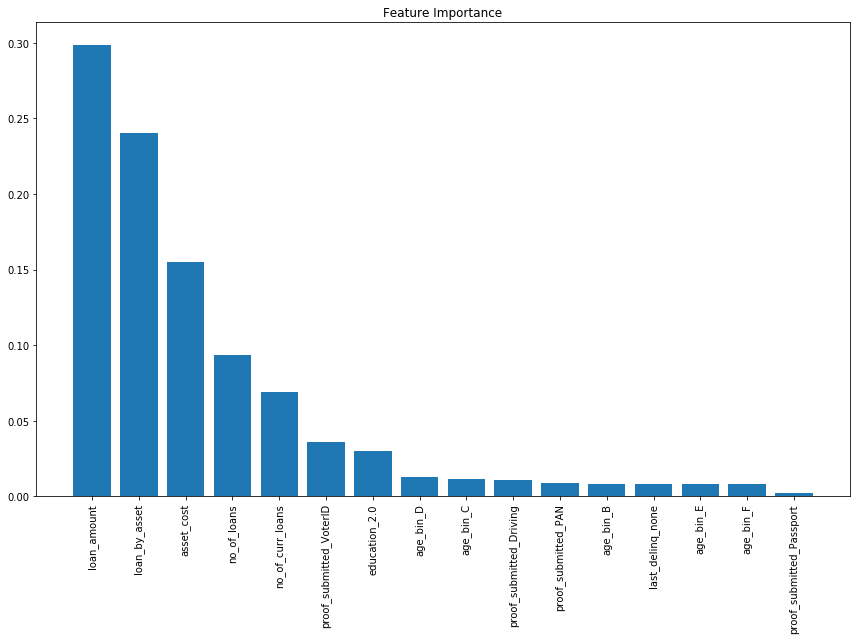

In [145]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

## Implementing lightGBM

In [146]:
threshold = 0.42

In [147]:
import lightgbm as lgb

In [167]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)

In [174]:
params = {
'boosting_type': 'gbdt',
'objective': 'binary',
'min_data_in_leaf':175,
'feature_fraction':0.7,
'max_depth':12,
'num_leaves':70,
'learning_rate':0.005
}

In [175]:
classifier_2_ = lgb.train(
params,
lgb_train,
num_boost_round=500,
valid_sets=[lgb_train, lgb_test],
early_stopping_rounds=10
)

/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Info] Number of positive: 2279, number of negative: 3321
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 835
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.406964 -> initscore=-0.376529
[LightGBM] [Info] Start training from score -0.376529
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's binary_logloss: 0.675568	valid_1's binary_logloss: 0.662541
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's binary_logloss: 0.675353	valid_1's binary_logloss: 0.662428
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's binary_logloss: 0.67514	valid_1's binary_logloss: 0.6623

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[113]	training's binary_logloss: 0.660099	valid_1's binary_logloss: 0.655111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[114]	training's binary_logloss: 0.659992	valid_1's binary_logloss: 0.655079
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[115]	training's binary_logloss: 0.659888	valid_1's binary_logloss: 0.655028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[116]	training's binary_logloss: 0.659769	valid_1's binary_logloss: 0.654978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[117]	training's binary_logloss: 0.659689	valid_1's binary_logloss: 0.65496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[118]	training's binary_logloss: 0.659582	valid_1's binary_logloss: 0.654913
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[119]	training

[305]	training's binary_logloss: 0.647331	valid_1's binary_logloss: 0.652055
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[306]	training's binary_logloss: 0.647282	valid_1's binary_logloss: 0.652066
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[307]	training's binary_logloss: 0.647239	valid_1's binary_logloss: 0.652081
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[308]	training's binary_logloss: 0.647202	valid_1's binary_logloss: 0.652079
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[309]	training's binary_logloss: 0.647153	valid_1's binary_logloss: 0.652076
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[310]	training's binary_logloss: 0.647104	valid_1's binary_logloss: 0.652077
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[311]	training's binary_logloss: 0.647056	valid_1's binary_logloss: 0.652081
[LightGBM] 

In [176]:
classifier_2_.predict(X_train)

array([0.49677957, 0.52266069, 0.44582   , ..., 0.38837938, 0.26590636,
       0.36589065])

In [177]:
# classifier_2_ = lgb.LGBMClassifier(max_depth=4, n_estimators= 50 ,learning_rate=0.5)
# classifier_2_.fit(X_train,y_train)

In [178]:
#making predictions on the train dataset
#y_predict_train = classifier.predict(X_train)
y_predict_train = (classifier_2_.predict(X_train)>=threshold).astype(int)

# checking the metric score
print(f"Confusion_matrix: {confusion_matrix(y_train,y_predict_train)}")
print(f"f1_score: {f1_score(y_train,y_predict_train)}")
print(f"accuracy: {accuracy_score(y_train,y_predict_train)}")
print(f"roc_auc_score: {roc_auc_score(y_train,y_predict_train)}")
print(f"classification_report: {classification_report(y_train,y_predict_train)}")

Confusion_matrix: [[2103 1218]
 [ 923 1356]]
f1_score: 0.5588295899443644
accuracy: 0.6176785714285714
roc_auc_score: 0.6141204025759726
classification_report:               precision    recall  f1-score   support

           0       0.69      0.63      0.66      3321
           1       0.53      0.59      0.56      2279

    accuracy                           0.62      5600
   macro avg       0.61      0.61      0.61      5600
weighted avg       0.63      0.62      0.62      5600



In [179]:
#making predictions on the test dataset
#y_predict_test =  classifier.predict(X_test)
y_predict_test = (classifier_2_.predict(X_test)>=threshold).astype(int)

# checking the metric score
print(f"Confusion_matrix: {confusion_matrix(y_test,y_predict_test)}")
print(f"f1_score: {f1_score(y_test,y_predict_test)}")
print(f"accuracy: {accuracy_score(y_test,y_predict_test)}")
print(f"roc_auc_score: {roc_auc_score(y_test,y_predict_test)}")

Confusion_matrix: [[532 347]
 [244 277]]
f1_score: 0.48384279475982533
accuracy: 0.5778571428571428
roc_auc_score: 0.5684515426053424


In [1686]:
# importances_lgb = classifier_2_.feature_importances_

# sorted_indices = np.argsort(importances_lgb)[::-1]

AttributeError: 'Booster' object has no attribute 'feature_importances_'

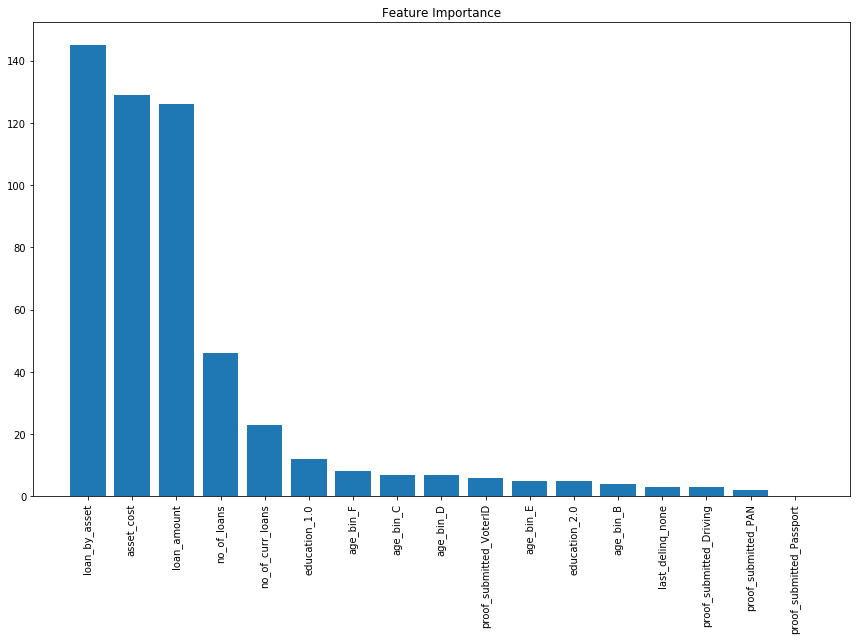

In [1254]:
# plt.figure(figsize=(12,9))
# plt.title('Feature Importance')
# plt.bar(range(X_train.shape[1]), importances_lgb[sorted_indices], align='center')
# plt.xticks(range(X_train.shape[1]), X.columns[sorted_indices], rotation=90)
# plt.tight_layout()
# plt.show()

In [1687]:
## implementing xgboost
import xgboost as xgb

In [1719]:
clssifier_3 = xgb.XGBClassifier(objective='binary:logistic',
                               n_estimators=250,
                               learning_rate=0.2,
                               max_depth=4,
                               )
clssifier_3.fit(X_train,y_train,
               verbose= True,
               early_stopping_rounds=10,
               eval_metric='aucpr',
               eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.46012
[1]	validation_0-aucpr:0.46863
[2]	validation_0-aucpr:0.46954
[3]	validation_0-aucpr:0.47465
[4]	validation_0-aucpr:0.47722
[5]	validation_0-aucpr:0.48456
[6]	validation_0-aucpr:0.48049
[7]	validation_0-aucpr:0.48027
[8]	validation_0-aucpr:0.48152
[9]	validation_0-aucpr:0.47661
[10]	validation_0-aucpr:0.47637
[11]	validation_0-aucpr:0.47999
[12]	validation_0-aucpr:0.47982


/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[13]	validation_0-aucpr:0.47903
[14]	validation_0-aucpr:0.47549
[15]	validation_0-aucpr:0.47882


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=250,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [1720]:
#making predictions on the train dataset
#y_predict_train = classifier.predict(X_train)
y_predict_train = (clssifier_3.predict_proba(X_train)[:,1]>=threshold).astype(int)

# checking the metric score
print(f"Confusion_matrix: {confusion_matrix(y_train,y_predict_train)}")
print(f"f1_score: {f1_score(y_train,y_predict_train)}")
print(f"accuracy: {accuracy_score(y_train,y_predict_train)}")
print(f"roc_auc_score: {roc_auc_score(y_train,y_predict_train)}")
print(f"classification_report: {classification_report(y_train,y_predict_train)}")

Confusion_matrix: [[1261 2089]
 [ 421 1829]]
f1_score: 0.5930609597924773
accuracy: 0.5517857142857143
roc_auc_score: 0.594653399668325
classification_report:               precision    recall  f1-score   support

           0       0.75      0.38      0.50      3350
           1       0.47      0.81      0.59      2250

    accuracy                           0.55      5600
   macro avg       0.61      0.59      0.55      5600
weighted avg       0.64      0.55      0.54      5600



In [1721]:
#making predictions on the test dataset
#y_predict_test =  classifier.predict(X_test)
y_predict_test = (clssifier_3.predict_proba(X_test)[:,1]>=threshold).astype(int)

# checking the metric score
print(f"Confusion_matrix: {confusion_matrix(y_test,y_predict_test)}")
print(f"f1_score: {f1_score(y_test,y_predict_test)}")
print(f"accuracy: {accuracy_score(y_test,y_predict_test)}")
print(f"roc_auc_score: {roc_auc_score(y_test,y_predict_test)}")

Confusion_matrix: [[297 553]
 [121 429]]
f1_score: 0.5600522193211488
accuracy: 0.5185714285714286
roc_auc_score: 0.5647058823529412


## Test DataFrame

In [1767]:
test_df = pd.read_csv('test_lffMruV.csv')

In [1768]:
test_df[test_df['age']==21]['education'].value_counts()

Series([], Name: education, dtype: int64)

In [1769]:
test_df[test_df['education'].isnull()]['age'].value_counts()

24    29
23    15
22    12
25    12
21     4
29     3
46     2
35     2
34     2
47     2
27     1
49     1
30     1
31     1
36     1
38     1
41     1
42     1
32     1
Name: age, dtype: int64

In [1770]:
df = test_df.copy()

In [1771]:
df.loc[(df['age']<=24) & (df['education'].isnull()),'education'] = 0.0

In [1772]:
df['age'].value_counts()

30    150
37    144
26    141
31    134
42    130
28    129
29    129
33    128
47    126
34    126
27    125
32    121
46    119
41    114
25    110
35    107
44    103
40    103
36    103
39    102
43     92
48     90
45     89
38     89
49     66
24     51
50     48
23     15
22     12
21      4
Name: age, dtype: int64

In [1773]:
df['education'].value_counts(dropna=False)

2.0    1639
1.0    1269
0.0      60
NaN      32
Name: education, dtype: int64

In [1774]:
for i in df[df['age']>24]['age'].unique():
    df.loc[(df['age']==i) & (df['education'].isnull()),'education'] = df[(df['age']==i)]['education'].mode()[0]

In [1775]:
df['age'].value_counts()

30    150
37    144
26    141
31    134
42    130
28    129
29    129
33    128
47    126
34    126
27    125
32    121
46    119
41    114
25    110
35    107
44    103
40    103
36    103
39    102
43     92
48     90
45     89
38     89
49     66
24     51
50     48
23     15
22     12
21      4
Name: age, dtype: int64

In [1776]:
df['education'].value_counts(dropna=False)

2.0    1667
1.0    1273
0.0      60
Name: education, dtype: int64

In [1777]:
# binning the age column
def binning(x):
    if(x<=25):
        return 'A'
    elif((x>25) & (x<=30)):
        return 'B'
    elif((x>30) & (x<=35)):
        return 'C'
    elif((x>35) & (x<=40)):
        return 'D'
    elif((x>40) & (x<=45)):
        return 'E'
    else:
        return 'F'

In [1778]:
df['age_bin'] = df['age'].apply(binning)

In [1779]:
df['age_bin'].value_counts()

B    674
C    616
D    541
E    528
F    449
A    192
Name: age_bin, dtype: int64

In [1780]:
df.dtypes

loan_id               int64
age                   int64
education           float64
proof_submitted      object
loan_amount           int64
asset_cost            int64
no_of_loans           int64
no_of_curr_loans      int64
last_delinq_none      int64
age_bin              object
dtype: object

In [1781]:
df['age_bin'].value_counts()

B    674
C    616
D    541
E    528
F    449
A    192
Name: age_bin, dtype: int64

In [1782]:
# converting the education column to categorical column
df['education'] = df['education'].astype(str)

In [1783]:
df.dtypes

loan_id              int64
age                  int64
education           object
proof_submitted     object
loan_amount          int64
asset_cost           int64
no_of_loans          int64
no_of_curr_loans     int64
last_delinq_none     int64
age_bin             object
dtype: object

In [1784]:
df['loan_by_asset'] = df['loan_amount']/df['asset_cost']

In [1785]:
# df.drop(columns=['loan_amount'],axis=1,inplace=True)

In [1786]:
df_1 = pd.get_dummies(df, columns = ['education','proof_submitted','age_bin'],drop_first=True)
df_1.columns

Index(['loan_id', 'age', 'loan_amount', 'asset_cost', 'no_of_loans',
       'no_of_curr_loans', 'last_delinq_none', 'loan_by_asset',
       'education_1.0', 'education_2.0', 'proof_submitted_Driving',
       'proof_submitted_PAN', 'proof_submitted_Passport',
       'proof_submitted_VoterID', 'age_bin_B', 'age_bin_C', 'age_bin_D',
       'age_bin_E', 'age_bin_F'],
      dtype='object')

In [1787]:
loan_ids = df_1.loan_id.values

In [1788]:
df_1.drop(columns=['loan_id','age'],axis=1,inplace = True)

In [1789]:
df_1

,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_by_asset,education_1.0,education_2.0,proof_submitted_Driving,proof_submitted_PAN,proof_submitted_Passport,proof_submitted_VoterID,age_bin_B,age_bin_C,age_bin_D,age_bin_E,age_bin_F
0,636936,768240,2,2,0,0.829085,1,0,0,0,0,0,1,0,0,0,0
1,548988,693060,3,3,0,0.792122,1,0,0,0,0,0,1,0,0,0,0
2,651756,936600,0,0,0,0.695874,1,0,0,0,0,0,1,0,0,0,0
3,614676,744840,4,3,0,0.825246,0,1,0,0,0,0,0,0,0,1,0
4,625236,839400,0,0,0,0.744861,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,353808,823656,0,0,0,0.429558,0,1,0,0,0,0,1,0,0,0,0
2996,767364,919380,4,2,0,0.834654,0,1,0,0,0,0,0,1,0,0,0
2997,639456,773088,2,2,0,0.827145,1,0,0,0,0,0,0,0,0,1,0
2998,687108,907728,0,0,0,0.756954,0,1,0,0,0,0,0,1,0,0,0


In [1790]:
df_test = df_1.copy()

In [1926]:
# y_predict_df_test = (classifier.predict_proba(df_test)[:,1]>=threshold).astype(int)

In [2045]:
y_predict_df_test = (classifier_2_.predict(df_test)>=threshold).astype(int)

In [2046]:
# #making predictions on the train dataset
# #y_predict_train = classifier.predict(X_train)
# y_predict_train = (classifier.predict_proba(df_test)[:,1]>=threshold).astype(int)

# # checking the metric score
# print(f"Confusion_matrix: {confusion_matrix(y_train,y_predict_train)}")
# print(f"f1_score: {f1_score(y_train,y_predict_train)}")
# print(f"accuracy: {accuracy_score(y_train,y_predict_train)}")
# print(f"roc_auc_score: {roc_auc_score(y_train,y_predict_train)}")
# print(f"classification_report: {classification_report(y_train,y_predict_train)}")

In [2047]:
final_df = pd.DataFrame({'loan_id':loan_ids,'loan_default':y_predict_df_test})

In [2048]:
final_df.to_csv('results_lgm_7.csv',index=False)